### Quantum Computing Advanced - Assignment VQE


- **Name:**  *Lilith bertens, Joy Park*
- **UniID:** *Bertenl, Parkes*

Welcome to the assignment on Variational Quantum Eigensolver of the Quantum Computing Advanced course! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the Qiskit online documentation or, even better, take a deep dive on the Qiskit tutorials.

#### Notes: 

1- Please make sure you have installed the Qiskit package. If you haven't, you can install it by running `!pip install qiskit` in a code cell. It is better to do so in a virtual environment.

2- Please write your code and answers in the cells created in this notebook. You can add new cells if necessary.

3- Don't forget to write documentation (docstrings) for the functions/codes you are implementing.

Briefly, you will be asked to implement a simple VQE algorithm to find the ground state energy of a given Hamiltonian. Then, you will be asked to implement a more complex VQE algorithm to find the ground state energy of a given Hamiltonian.

### Python environment
First, start with importing the required libraries and setting up the environment.

In [8]:
# Import the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

params = [Parameter("theta"), Parameter("phi"), Parameter("lam")]
#from qiskit import BasicAer, execute
from qiskit.quantum_info import partial_trace, Statevector

#from qiskit.algorithms.optimizers import SPSA, SLSQP, COBYLA



### Note,

This assignment is about using the Variational Quantum Eigensolver to find the ground state energy of a specific molecule. As I mentioned during the class, for last year's assignment I used a different version of Qiskit; hence, I used the following example material:

  1. [Simulating Molecules using VQE](https://qiskit.org/textbook/ch-applications/vqe-molecules.html)
  2. [The Variational Quantum Eigensolver](https://medium.com/@lana.bozanic/the-variational-quantum-eigensolver-efb8fab14c85)
  3. [The Variational Quantum Eigensolver, Implemented with IBM’s Qiskit](https://medium.com/@ziyu.lili.maggie/the-variational-quantum-eigensolver-c473c6dcd46)


  
Be aware of version differences of Qiskit and we might use slighly different versions; hence, some algorithms were changed and some information was no longer valid. In any case, I managed to solve this assignment using the following example material:

  1. [Electronic Structure - Qiskit Nature](https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html)
  2. [Ground State Solver - Qiskit Nature](https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html)

If you analyze carefully all these 5 tutorials, combining and adapting them, you should be able to solve these exercises. 

We will give you some explanations, some hints, and some code to start with.

First, we check if `pyscf` is installed. If not, we install it.

In [10]:
!pip install pyscf

Defaulting to user installation because normal site-packages is not writeable


This does not work for windows btw ^, or at least, not without going through 20 hoops   
I first needed to install wsl, enable a couple windows features, and then install python again and more.

We import the necessary libraries and set up the environment.

In [11]:
from pyscf import gto, scf, ao2mo, fci

### H2 potential energy surface

The following is an example of a potential energy surface for the hydrogen molecule. The potential energy surface is a 2D plot of the energy of the molecule as a function of the bond length. The bond length is the distance between the two hydrogen atoms. The potential energy surface is a useful concept in chemistry because it helps us understand how the energy of a molecule changes as the atoms move. The potential energy surface is a key concept in the study of chemical reactions because it helps us understand how the energy of a molecule changes as it goes from reactants to products.

Run the following code example and try to understand it. Ask me if you have any questions.


In [12]:
def FCI(L, e_list):
  mol = gto.M(atom='H 0 0 ' + str(L) + '; H 0 0 0', basis='sto-3g')
  mf = scf.RHF(mol).run()
  h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
  eri = ao2mo.kernel(mol, mf.mo_coeff)
  cisolver = fci.direct_spin1.FCI(mol)
  e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
  e_list += [e]
  return e_list
  #print(e)

def FCIZ(L, e_list):
  mol = gto.M(atom='H 0 0 ' + str(L) + '; Li 0 0 0', basis='sto-3g')
  mf = scf.RHF(mol).run()
  h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
  eri = ao2mo.kernel(mol, mf.mo_coeff)
  cisolver = fci.direct_spin1.FCI(mol)
  e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
  e_list += [e]
  return e_list

In [13]:
e_fci = []

bond_length_fci = np.linspace(0.1, 3.0, 30)

for i in range(len(bond_length_fci)):
    e_fci = FCIZ(bond_length_fci[i], e_fci)
    #e_fci = FCI(bond_length_fci[i], e_fci)

from IPython.display import clear_output
clear_output()


In [14]:
FCI(0.7414, [])

converged SCF energy = -1.11668438708534


[-1.137270174660904]

Text(0.5, 1.0, 'HLi Ground State Energy')

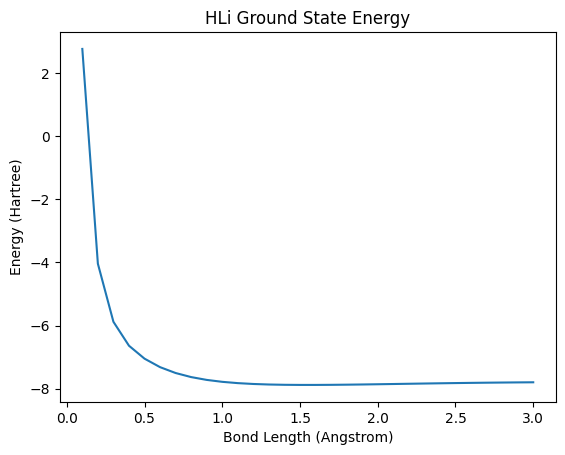

In [15]:
plt.plot(bond_length_fci, e_fci)
# axis labels
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (Hartree)")
plt.title("HLi Ground State Energy")

#### Question 1

1. What is the equilibrium bond length of the hydrogen molecule?
2. What is the dissociation energy of the hydrogen molecule?

Write your answers in the cell below.

1. it is -1.11668438708534 Hartree
2. it is -1.137270174660904 Hartree

#### Question 2

Change the above `pyscf` code and plot the potential energy surface for LiH molecule.  

I edited the code to use Li for one of the atoms instead of H (lithium and hydrogen)

### Understanding the problem: 

The first step is to understand the problem. We will start by understanding the Hamiltonian composed of Pauli operators. Then, we will understand the problem of finding the ground state energy of a given Hamiltonian. After, we will understand the VQE algorithm and how it can be used to solve this problem.

#### A quick recap of the VQE algorithm:

Finding the ground state of molecules is a key problem in quantum chemistry. Typically, we need a Hamiltonian to describe a molecular system. The Hamiltonian is composed of two parts: a kinetic energy operator and potential energy operator. We can see this in the following equation: 

$$ H = T + V $$

Typically, the Hamiltonian is a matrix on a computer that describes the possible energies and behaviors of a system. The ground state energy of the Hamiltonian is the lowest energy that the system can have. This is the energy that the system will tend to be in. The behavior is described by the wavefunction of the system. The wavefunction is a complex function that describes the behavior of the system. The ground state wavefunction is the wavefunction that corresponds to the ground state energy.

Eigenvalues: the energies of the system. Each system has multiple states and the eigenvalues are the energies of these states. The ground state energy is the lowest eigenvalue.

Eigenvectors: the wavefunctions of the system. Each system has multiple states and the eigenvectors are the wavefunctions of these states. The ground state wavefunction is the wavefunction that corresponds to the ground state energy.

##### The VQE algorithm:
Variational Quantum Eigensolver (VQE) helps us in estimating the upper bound of the ground state energy. Our job is to decrease the difference between the upper bound and the actual ground state energy. The VQE is an extension of the classical variational principle. The variational principle states that for any Hamiltonian, the ground state energy is always greater than or equal to the expectation value of the Hamiltonian with respect to any trial wavefunction. 

### The variational principle:
The variational principle states that for any Hamiltonian, the ground state energy is always greater than or equal to the expectation value of the Hamiltonian with respect to any trial wavefunction.

Let's say we have a Hamiltonian H and a trial wavefunction $|ψ⟩$. The action of H on $|ψ⟩$ gives the eigenvalue of H:
$$ H|ψ_{\lambda}⟩ = E_{\lambda}|ψ_{\lambda}⟩ $$


The expectation value of H with respect to $|ψ⟩$ is given by:
$$ E_{\lambda} = ⟨ψ_{\lambda}|H|ψ_{\lambda}⟩ $$

The variational principle:
$$⟨ψ_{\lambda}|H|ψ_{\lambda}⟩ ≥ E_{0}$$

Where $E_{0}$ is the ground state energy of $H$. The variational principle states that the expectation value of $H$ with respect to any trial wavefunction is always greater than or equal to the ground state energy of $H$. The VQE algorithm uses this principle to estimate the ground state energy of a given Hamiltonian.



##### Understanding the Hamiltonian:
To find the ground state energy of a given Hamiltonian on a quantum computer, we need first to define this Hamiltonian in terms of Pauli operators or Pauli strings. 

Hence, we come to the concept of `ansatz`. The ansatz is a parameterized quantum circuit that prepares a trial wavefunction. The VQE algorithm uses the ansatz to prepare a trial wavefunction and then uses the variational principle to estimate the ground state energy of a given Hamiltonian. 

Ansatz is used to explore the space of possible wavefunctions/states. The parameterized quantum circuit could be, for example, $R_y$ gate.

The usability of Hamiltonian in quantum chemistry is actually more generic and can be used in other domains 

##### VQE steps: 
1. Obtain the Hamiltonian of the problem. 
2. Divide the Hamiltonian into terms. 
3. Choose an ansatz: a parameterized quantum circuit that prepares a trial wavefunction.
4. Choose a backend: a quantum computer or a quantum simulator.
5. Choose an optimizer: a classical optimization algorithm.
6. Perform the measurements: measure the expectation value of the Hamiltonian with respect to the trial wavefunction. Typically, this is measured by finding the expectation value about the Pauli $Z$ gate.

##### Convert Pauli strings to parameterized quantum circuits:
1. For Pauli $X$ gate: $X = R_y(-\pi/2)$.
2. For Pauli $Y$ gate: $Y = R_x(\pi/2)$.
3. For Pauli $Z$ gate: $Z = I$. So we do not need to do anything.
 

#### Example:
Now, let's start by understanding the Hamiltonian of the problem. 
Given the following Hamiltonian: 
$$ H = X$$ 

For one qubit, we code the equivalent parameterized quantum circuits. Our ansatz will be $R_y(\theta)$ gate and then we add the gate $R_y(-\pi/2)$ to simulate the Pauli $X$ gate. 


     ┌───────────┐┌──────────┐┌─┐
  q: ┤ Ry(theta) ├┤ Ry(pi/2) ├┤M├
     └───────────┘└──────────┘└╥┘
c: 1/══════════════════════════╩═
                               0 


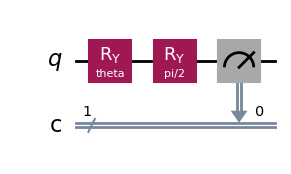

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# Example 1: Create a quantum circuit with 1 qubit and 1 classical bit
qr_0 = QuantumRegister(1, name="q")
cr = ClassicalRegister(1, name="c")
#print(qc_0)
# act on the qubit with a rotation gate R_y(theta)
qc = QuantumCircuit(qr_0,cr)

# Define our ansatz
qc.ry(params[0],qr_0)

# Substitute Pauli gate X with the rotation gate R_y(-pi/2)
param_paulis = [Parameter("pi/2"), Parameter("$\pi/2$")] 
qc.ry(param_paulis[0],qr_0)

# Measure the qubit
qc.measure(qr_0,cr)
print(qc)

# we can also draw the circuit
qc.draw(output='mpl')


Similarly, if we have the Pauli $Y$ gate, we would add the gate $R_x(\pi/2)$ to simulate the Pauli $Y$ gate. If we have the Pauli $Z$ gate, we would not need to do anything and we end up only with the ansatz $R_y(\theta)$ gate.

#### Question 1:
Now, let's start by understanding the Hamiltonian of the problem. 
Given the following Hamiltonian: 
$$ H = 2*Z + X + I $$ 

First, divide the Hamiltonian into terms. Code the equivalent parameterized quantum circuits for each term of the Hamiltonian.

        ┌───────┐┌───────┐┌──────────┐ ░ ┌─┐
     q: ┤ Ry(0) ├┤ Ry(0) ├┤ Ry(-π/2) ├─░─┤M├
        └───────┘└───────┘└──────────┘ ░ └╥┘
meas: 1/══════════════════════════════════╩═
                                          0 


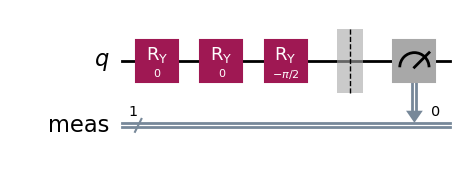

In [76]:
# Question 1: write your code here,
# to create a quantum circuit of 1 qubit and 1 classical bit
# act on the qubit with the ansatz and the gate equivalent to the Hamiltonian term
import math
# Term 1:Ansatz = 2*(Z)
def H1_ansatz(n_qubits, theta):
    qc = QuantumCircuit(n_qubits)
    qc.ry(theta, 0)
    return qc

# Term 2: Hamiltonian = X
def H2_ansatz(n_qubits, theta):
    qc = QuantumCircuit(n_qubits)
    qc.ry(theta, 0)
    qc.ry(-math.pi/2, 0)
    return qc

# Term 3: Hamiltonian = I
def H3_ansatz(n_qubits, theta): #this does nothing btw
    qc = QuantumCircuit(n_qubits)
    return qc

# You can combine the ansatz for each term to create the ansatz for the Hamiltonian
def Hamiltonian_ansatz(n_qubits, theta):
 # write your code here
    qc = H1_ansatz(1, theta)
    qc &= H2_ansatz(1, theta)
    qc &= H3_ansatz(1, theta)
    return qc
    
    
qc = Hamiltonian_ansatz(1, 0)
qc.measure_all(qc)
print(qc)
# we can also draw the circuit
qc.draw(output='mpl')

#### Question 2:

Now, let's calculate the expectation value of the Hamiltonian with respect to the trial wavefunction at $\theta = 0$. You can write a code of a function to calculate the expectation value of each term of the Hamiltonian separately and then sum them up. Use the fact that the expectation value of the Pauli $Z$ gate is given by the following equation: 
$$ \langle \psi(\theta=0) |\psi(\theta=0) \rangle = 1$$

Example, the expectation value of the first term $H_1$ is evaluated as:
$$ \langle \psi(\theta=0) |H_1|\psi(\theta=0) \rangle$$



Write function to calculate the expectation value of the Hamiltonian H1.

In [184]:
# Write function to calculate the expectation value of the Hamiltonian H1
def getexpec(QuantumCirc, MeasurementGateMatrix):
    SV = Statevector(QuantumCirc)
    Gate = np.array(MeasurementGateMatrix)
    expec = np.dot(np.conjugate(SV), np.dot(Gate, SV))
    return expec

Z_Gate = [[1,0],[0,-1]]
print(getexpec(H1_ansatz(1, 0), Z_Gate))

(1+0j)


Develop a function that can compute the expectation value of the second term of the Hamiltonian with respect to the trial wavefunction at $\theta = 0$:

$$ \langle \psi(\theta=0) |H_2|\psi(\theta=0) \rangle$$

Calculate the expectation value of the Hamiltonian $H_2$.

In [185]:
print(getexpec(H2_ansatz(1, 0), Z_Gate))

(2.220446049250313e-16+0j)


Similarly, develop a function that can compute the expectation value of the third term of the Hamiltonian with respect to the trial wavefunction at $\theta = 0$:
$$ \langle \psi(\theta=0) |H_3|\psi(\theta=0) \rangle$$

Finally, sum up the expectation values of the three terms to get the expectation value of the Hamiltonian with respect to the trial wavefunction at $\theta = 0$.


Calculate the expectation value of the Hamiltonian $H_3$.

In [186]:
print(getexpec(H3_ansatz(1, 0), Z_Gate))

(1+0j)


#### Question 3:

Repeat the previous question for $\theta = \pi$.

In [187]:
# Question 3: write your code here,
print(getexpec(H1_ansatz(1, math.pi), Z_Gate))
print(getexpec(H2_ansatz(1, math.pi), Z_Gate))
print(getexpec(H3_ansatz(1, math.pi), Z_Gate))

(-1+0j)
(-2.220446049250313e-16+0j)
(1+0j)


#### Question 4:

Combine the three functions into one function that can calculate the expectation value of the Hamiltonian with respect to the trial wavefunction at any given $\theta$.

(-1+0j)
[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


/home/freek/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/freek/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


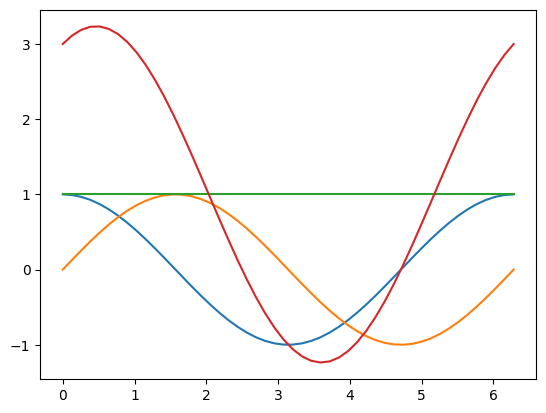

In [188]:
# Write a full function to calculate the expectation value of the Hamiltonian terms H1, H2, H3
# and the total Hamiltonian H_total
def H_total_expectation_value(n_qubits, th_value, gate):
    # Declare the parameter theta for the ansatz
    totalval = 2*getexpec(H1_ansatz(n_qubits, th_value), gate)#dont forget the 2*
    totalval += getexpec(H2_ansatz(n_qubits, th_value), gate)
    totalval += getexpec(H3_ansatz(n_qubits, th_value), gate)
    return totalval
# write your code here    

print(H_total_expectation_value(1, math.pi, Z_Gate))
ran = np.linspace(0, 2*math.pi) #this gives us a full circle
print(ran)
h1 = []
h2 = []
h3 = []
htotal = []

for i in ran:
    h1.append(getexpec(H1_ansatz(1, i), Z_Gate))
    h2.append(getexpec(H2_ansatz(1, i), Z_Gate))
    h3.append(getexpec(H3_ansatz(1, i), Z_Gate))
    htotal.append(H_total_expectation_value(1, i, Z_Gate))

plt.plot(ran, h1)
plt.plot(ran, h2)
plt.plot(ran, h3)
plt.plot(ran, htotal)
plt.show()


PFFFFFFFF, its only the mirror image of the graph underneath, i think i did it.

Plot the expectation value of the Hamiltonian with respect to the trial wavefunction at fine grid of $\theta$ values between $0$ and $2\pi$.

You should get something similar to this plot:

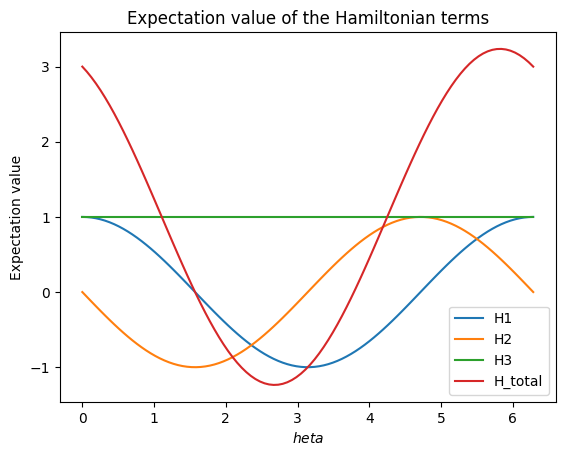

Variational Quantum Eigensolver (VQE) is a hybrid algorithm that uses a variational technique and interleaves quantum and classical computations in order to find the minimum eigenvalue of the Hamiltonian. Classical computers are used to update the variational parameters like $\theta$ and to do post processing after the measurements. The hybrid approach will come later when you use qiskit. 

Typically, we need more parameters to get a better approximation of the ground state energy. The more parameters we have, the more complex the quantum circuit will be. 

The gate $U_3$ takes three parameters: $\theta$, $\phi$, and $\lambda$. The gate $U_3$ is a generalization of the $R_y$ gate. The $U_3$ gate is defined as follows:


$$
\begin{aligned}
    U3(\theta, \phi, \lambda) = \begin{pmatrix}\cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\ e^{i\phi}\sin(\frac{\theta}{2}) & e^{i\lambda + i\phi}\cos(\frac{\theta}{2}) \end{pmatrix}
\end{aligned}
$$
Up to a global phase, any possible single qubit operation can be performed using the $U_3$ gate. The universal "variational" form of the $U_3$ gate has three parameters that can be efficiently optimized by a classical computer.

Thus, in the following question, you will be asked to implement a more complex VQE algorithm to find the ground state energy of a given Hamiltonian. Instead of using a single parameterized quantum circuit with $\theta$, you will be using a parameterized quantum circuit with three parameters: $\theta$, $\phi$, and $\lambda$ in $U_3$ gate.


Now, we will use a single qubit and implement a simple VQE algorithm to find the ground state energy with a parameterized quantum circuit with three parameters: $\theta$, $\phi$, and $\lambda$ in $U_3$ gate. To optimize the values of the parameters, we will use an optimization algorithm that minimizes the expectation value of the Hamiltonian with respect to the trial wavefunction.Specifically, for a given random probability distribution of the parameters, we want to determine the values of the parameters that make our single qubit variational quantum circuit that outputs a probability distribution close to $\vec{x}$ (where closeness is defined by the fidelity between the two probability distributions).

#### Question 5-A:
First, we create a random probability distribution. Create a function that generates a random probability distribution with two targets: from 0 to $p_0$ and from 1 to $p_0$, where $p_0$ is a random number between 0 and 1.

In [93]:
import random
def random2():
    p0 = random.random()
    return random.uniform(0, p0), random.uniform(p0, 1)
    
print(random2())

(0.38985052356386807, 0.886087558734599)


#### Question 5-B:
Create a function that takes the three parameters $\theta$, $\phi$, and $\lambda$ of our gate $U_3$, acts on a quantum register of a single qubit, and returns the corresponding quantum circuit.


In [128]:
# Question 5-B: write your code here
import qiskit
import math

def U3(theta, phi, lam):
    qc = QuantumCircuit(1)
    OP = qiskit.quantum_info.operators.Operator([
        [math.cos(theta/2)                      ,  (-math.e**(1j*lam))*math.sin(theta/2)       ],
        [(math.e**(1j*phi))*math.sin(theta/2)   ,  (math.e**(1j*phi+1j*lam))*math.cos(theta/2) ]
    ])
    qc.unitary(OP, 0, label='U3')
    return qc

qc = U3(0,0,0)
print(qc)

   ┌────┐
q: ┤ U3 ├
   └────┘


#### Question 5-C:
Now, let's develop the objective function. We can first use the sampler from Qiskit to sample the probability distribution of the quantum circuit's output. After that, we get the probability distribution of the quantum circuit's output and calculate the fidelity between the two probability distributions. So that the cost will be 
````python

cost = sum(
        abs(target_distr.get(i, 0) - output_distr.get(i, 0))
        for i in range(2**qc.num_qubits)
    )
````

For that, you will need to include IBM quantum account credentials like the name of the service (channel) and your account token. You can register on the IBM Quantum lab website to get your API token.

Ask me if you have any issues :) 


In [168]:
# Question 5-C: write your code here
#from qiskit_aer.primitives import Sampler, Estimator

#sampler = Sampler("ibmq_qasm_simulator")
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

rand1, rand2 = random2()
costs = []

def objective_function(params):
    """Compares the output distribution of our circuit with
    parameters `params` to the target distribution."""
    qc = U3(params[0], params[1], params[2])
    #qc = U3(params[0], a, b)
    VC = Statevector(qc)
    o1 = abs(rand1 - VC[0])
    o2 = abs(rand2 - VC[1])
    cost = o1 + o2
    costs.append(cost)
    return cost


#print(objective_function([0, 0, 0]))

#### Question 5-D:

Finally, we need to use COBYLA optimizer to minimize the cost function. We can create instance of the optimizer as follows:
````python

optimizer = COBYLA(maxiter=500, tol=0.0001)
# Create the initial parameters (noting that our
# single qubit variational form has 3 parameters)
initial_point = np.random.rand(3)

result = optimizer.minimize(fun=objective_function, x0=initial_point)

````

Note that the output varies from run to run due to random noise. Moreover, while close, the obtained distribution will not be exactly the same as the target distribution.

Parameters Found: [ 1.61538144 -0.00630624  0.95856184]
Target Distribution: 0.6911510910601808 and 0.9968069840431898
Obtained Distribution: Statevector([0.69116917+0.j        , 0.72267863-0.00455744j],
            dims=(2,))
Cost: 0.2741843199396032


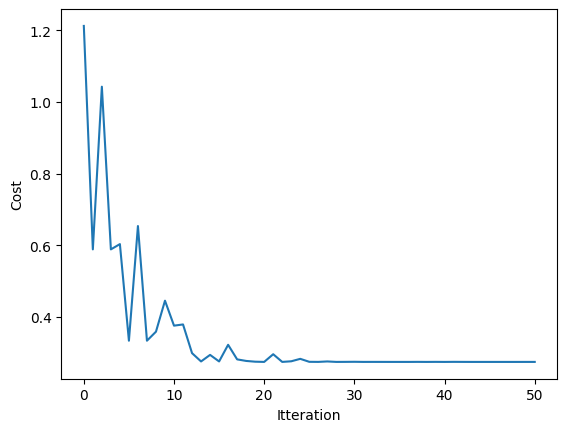

In [169]:
# Question 5-D: write your code here
from qiskit_algorithms.optimizers import SLSQP, COBYLA
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

initial_point = np.random.rand(3)
#optimizer = COBYLA(maxiter=500, tol=0.0001)
result = minimize(objective_function, x0=initial_point, method='COBYLA')  
# Create the initial parameters (noting that our
# single qubit variational form has 3 parameters)


#result = optimizer.minimize(fun=objective_function, x0=initial_point)

# Obtain the output distribution using the final parameters

# write your code here

print("Parameters Found:", result.x)
print("Target Distribution:", rand1, "and", rand2)
params = result.x
qc = U3(params[0], params[1], params[2])
print("Obtained Distribution:", Statevector(qc))
print("Cost:", objective_function(result.x))
ran = range(0, len(costs))
plt.plot(ran, costs)
plt.ylabel("Cost")
plt.xlabel("Itteration")
plt.show()

## VQE Qiskit implementation Example for $H_2$:

Now, let's implement the VQE algorithm using Qiskit for $H_2$ molecule. 
First, we will need to import the required libraries and set up the environment.

In [171]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

In [172]:
# pylint: disable=line-too-long
#import qiskit_nature
from qiskit_algorithms import VQE
from qiskit_algorithms import NumPyEigensolver
#from qiskit.algorithms import NumPyEigensolver
# from qiskit_nature.second_q.transformers import FreezeCoreTransformer
# from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
# from qiskit_nature.second_q.mappers import ParityMapper
# from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock

# qiskit_nature.settings.use_pauli_sum_op = False  # pylint: disable=undefined-variable
# # pylint: enable=line-too-long
# from qiskit_nature.second_q.drivers import PySCFDriver
# import matplotlib.pyplot as plt
# from qiskit.circuit.library import EfficientSU2

In [173]:
numpy_solver = NumPyEigensolver(k=4, filter_criterion=es_problem.get_default_filter_criterion())


In [174]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.problems import ElectronicBasis

mapper = JordanWignerMapper()
parity_mapper = ParityMapper()

### Running VQE on a Simulator


In this section, we will run the VQE algorithm on a simulator. We will calculate the ground state energy for LiH molecule using the VQE algorithm at various interatomic distances. For each interatomic distance, a driver has to be created. 

To reduce the problem complexity and also the number of qubits, we freeze the core electrons and remove two unoccupied orbitals.

It is very hard most of the time to perform the optimization in a real quantum computer. The noise in the quantum computer will affect the results.

#### Question 6:

Below, there is a VQE example for $H_2$ molecule from Qiskit tutorials. Adapt this code to and calculate the potential energy surface for LiH molecule. 

For the complete tutorial, please refer to: https://qiskit-community.github.io/qiskit-nature/tutorials/01_electronic_structure.html


In [205]:
# Setting up the PySCF driver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

def driver_get(BondDist):
    driver = PySCFDriver(
        atom="H 0 0 0; Li 0 0 " + str(BondDist),
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    return driver

problem = driver_get(1).run()
print(problem)

Now, we need the electronic energy Hamiltonian. It should be represented in the second quantization form with 1- and 2-body integrals. We can use the `ElectronicStructureProblem` class from Qiskit Nature to generate the second quantized operators.

In [206]:
hamiltonian = problem.hamiltonian

coefficients = hamiltonian.electronic_integrals
print(coefficients.alpha)

Polynomial Tensor
 "+-":
array([[-4.92136042,  0.14792632,  0.17076042,  0.        ,  0.        ,
         0.07075424],
       [ 0.14792632, -1.74597686,  0.04857006,  0.        ,  0.        ,
        -0.32648454],
       [ 0.17076042,  0.04857006, -1.17570519,  0.        ,  0.        ,
         0.03525707],
       [ 0.        ,  0.        ,  0.        , -1.19816455,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.19816455,
         0.        ],
       [ 0.07075424, -0.32648454,  0.03525707,  0.        ,  0.        ,
        -0.94382097]])
 "++--":
array([ 1.64540443e+00, -1.62784261e-01,  3.16932847e-02,  4.68374943e-01,
        1.48579392e-02,  5.24263161e-01, -1.25889429e-01,  1.36581294e-02,
       -2.57063055e-02,  1.94591134e-02,  1.94991441e-03, -6.54161895e-03,
       -3.88117953e-02,  6.20313540e-04,  9.46591280e-03,  3.94092442e-01,
       -1.63023173e-02,  2.46646880e-01,  3.25787139e-03, -1.38941183e-03,
        3.39004010e-

In [207]:
second_q_op = hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=12, number terms=1860
  0.8227022145915194 * ( +_0 +_0 -_0 -_0 )
+ -0.08139213028850507 * ( +_0 +_0 -_1 -_0 )
+ -0.06294471447845953 * ( +_0 +_0 -_2 -_0 )
+ -0.0345271205609152 * ( +_0 +_0 -_5 -_0 )
+ -0.08139213028850507 * ( +_0 +_1 -_0 -_0 )
+ 0.23418747126218017 * ( +_0 +_1 -_1 -_0 )
+ 0.0009749572045354163 * ( +_0 +_1 -_2 -_0 )
+ 0.044384152860711915 * ( +_0 +_1 -_5 -_0 )
+ -0.06294471447845953 * ( +_0 +_2 -_0 -_0 )
+ 0.0009749572045354163 * ( +_0 +_2 -_1 -_0 )
+ 0.19704622120182383 * ( +_0 +_2 -_2 -_0 )
+ 0.010534100534974424 * ( +_0 +_2 -_5 -_0 )
+ 0.19804451440726992 * ( +_0 +_3 -_3 -_0 )
+ 0.19804451440726992 * ( +_0 +_4 -_4 -_0 )
+ -0.0345271205609152 * ( +_0 +_5 -_0 -_0 )
+ 0.044384152860711915 * ( +_0 +_5 -_1 -_0 )
+ 0.010534100534974424 * ( +_0 +_5 -_2 -_0 )
+ 0.1918879262577406 * ( +_0 +_5 -_5 -_0 )
+ 0.8227022145915194 * ( +_0 +_6 -_6 -_0 )
+ -0.08139213028850507 * ( +_0 +_6 -_7 -_0 )
+ -0.06294471447845953 * ( +_0 +_6 -_8 -_0 )
+ -

The above is the pure electronic Hamiltonian of the molecule. The nuclear repulsion energy is not included in the electronic Hamiltonian. The nuclear repulsion energy is the energy required to bring the nuclei from infinity to their equilibrium positions. It is a constant value for a given molecule and is added to the electronic energy to get the total energy of the molecule.

In [208]:
hamiltonian.nuclear_repulsion_energy  # NOT included in the second_q_op above

1.5875316327600002

In [209]:
problem.molecule

MoleculeInfo(symbols=['H', 'Li'], coords=[(0.0, 0.0, 0.0), (0.0, 0.0, 1.8897261245650618)], multiplicity=1, charge=0, units=<DistanceUnit.BOHR: 'Bohr'>, masses=[1, 7])

In [210]:
problem.reference_energy

-7.767362135748564

In [211]:
problem.num_particles

(2, 2)

In [212]:
problem.num_spatial_orbitals

6

In [213]:
problem.basis

<ElectronicBasis.MO: 'molecular'>

### Solving the ElectronicStructureProblem

In [214]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper

solver = GroundStateEigensolver(
    JordanWignerMapper(),
    NumPyMinimumEigensolver(),
)

result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -9.371991912791
  - computed part:      -9.371991912791
~ Nuclear repulsion energy (Hartree): 1.58753163276
> Total ground state energy (Hartree): -7.784460280031
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  5.66917837]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  3.810645344669]
    - computed part:      [0.0  0.0  3.810645344669]
  > Dipole moment (a.u.): [0.0  0.0  1.858533025331]  Total: 1.858533025331
                 (debye): [0.0  0.0  4.723919312426]  Total: 4.723919312426
 
